# 機械学習入門
##  第2回の演習ノートブック [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/isshiki/machine-learning-with-python/blob/main/02-scikit-learn/02_scikit-learn_practice.ipynb)

- ＠IT連載： [『Pythonで学ぶ「機械学習」入門【知識ゼロでも大丈夫】』](https://atmarkit.itmedia.co.jp/ait/subtop/features/di/machinelearning_index.html)
- 対応記事： [「scikit-learn入門＆使い方 ― 機械学習の流れを学ぼう」](https://atmarkit.itmedia.co.jp/ait/articles/2404/11/news029.html)

このノートブックは、[Apache License 2.0ライセンス](https://opensource.org/license/apache-2-0)で提供しています。商用でも使用・改変・複製・再配布が可能です。詳細については、LICENSEファイルをご覧ください。

In [ ]:
#@title 実行環境のバージョンチェック

# Pythonや各ライブラリのバージョンによって、Pythonコードの挙動が異なる可能性があります。
# そのため、サンプルノートブック作成時の実行環境と一致させられるよう、本連載で提供する全てのサンプルノートブックではバージョン情報を出力しています。

from datetime import datetime
import platform
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn

print(f'実行日: {datetime.now():%Y年%m月%d日}')
print(f'Python version: {platform.python_version()}')
print(f'NumPy version: {np.version.version}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version: {matplotlib.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'scikit-learn version: {sklearn.__version__}')

# 実行日: 2025年06月15日
# Python version: 3.11.13
# NumPy version: 2.0.2
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2
# scikit-learn version: 1.6.1

実行日: 2025年06月15日
Python version: 3.11.13
NumPy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2
scikit-learn version: 1.6.1


通常はこのインストール作業は不要です。各ライブラリーのバージョンを、本ノートブック作成時と一致させたい場合は、次のコマンドをコードセルに入力して再インストールしてください。コマンド実行には管理者権限が必要です。

```bash
! pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1
```

### ■0. 今回使用するデータセット

今回は、あやめ（Iris）という花のデータセットを使います（配布元：<https://doi.org/10.24432/C56C76>、ライセンス：[CC BY 4.0](https://creativecommons.org/licenses/by/4.0/legalcode.ja)）。

- <https://raw.githubusercontent.com/isshiki/machine-learning-with-python/main/02-scikit-learn/iris_processed.csv>

### ■1. サンプルデータを読み込んでみよう（pandas使用）

In [2]:
import pandas as pd

# データの読み込み
url = 'https://raw.githubusercontent.com/isshiki/machine-learning-with-python/main/02-scikit-learn/iris_processed.csv'
df = pd.read_csv(url)

# データの確認
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,NaN,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### ■2. 前処理：カテゴリー値を数値に置き換えよう（pandas使用）

In [3]:
# カテゴリー値を数値にマッピング
class_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['Class_ID'] = df['Class'].map(class_mapping)

# データの確認
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,Class_ID
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,NaN,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


### ■3. 前処理：欠損値がないか確認し、あれば対処しよう

#### ●欠損値の有無を調べる（pandas使用）

In [4]:
# 各列における欠損値の数を確認
df.isna().sum()

Sepal Length    0
Sepal Width     1
Petal Length    0
Petal Width     0
Class           0
Class_ID        0
dtype: int64

#### ●欠損値を処理する（pandas使用）

In [5]:
# 欠損値のある行を削除
df_dropped = df.dropna()

# 結果の出力
print('元データの行数： ', len(df))
print('欠損値処理済みデータの行数： ', len(df_dropped))

元データの行数：  150
欠損値処理済みデータの行数：  149


### ■4. 前処理：異常値がないか確認し、あれば対処しよう

#### ●グラフから異常値を検出する（Matplotlib使用）

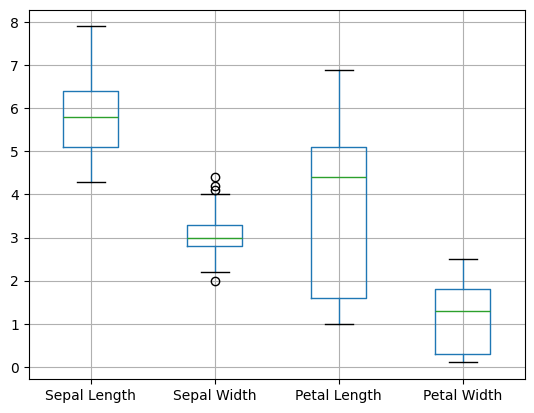

In [6]:
import matplotlib.pyplot as plt

# 4つの特徴量（説明変数）を選択
df_features = df_dropped.loc[:, ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]

# 箱ひげ図を表示
df_features.boxplot()
plt.show()

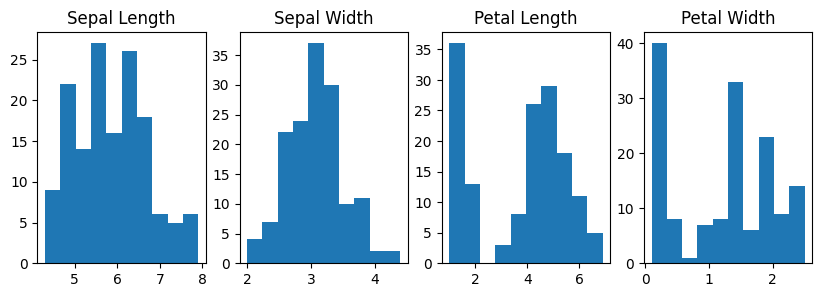

In [7]:
# 【参考】ヒストグラムを表示する場合（本ノートブックのみに掲載）
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for i, feature in enumerate(df_features.columns):
    axes[i].hist(df_features[feature])
    axes[i].set_title(feature)
plt.show()

#### ●統計量からも異常値を確認する（pandas使用）

In [8]:
# 選択した特徴量の基礎統計量を表示
df_features.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.851007,3.056376,3.774497,1.206040
std,0.825491,0.437178,1.759613,0.760354
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### ■【応用テクニック】より洗練された可視化と数値計算

#### ●より高度なグラフ描画（seaborn使用）

In [9]:
! pip install seaborn==0.13.2

In [10]:
# 【参考】Irisデータセットの全特徴量をワイド形式からロング形式に変換した例（本ノートブックのみに掲載）
display(df_features)
display(pd.melt(df_features))

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,variable,value
0,Sepal Length,5.1
1,Sepal Length,4.9
2,Sepal Length,4.6
3,Sepal Length,5.0
4,Sepal Length,5.4
...,...,...
591,Petal Width,2.3
592,Petal Width,1.9
593,Petal Width,2.0
594,Petal Width,2.3


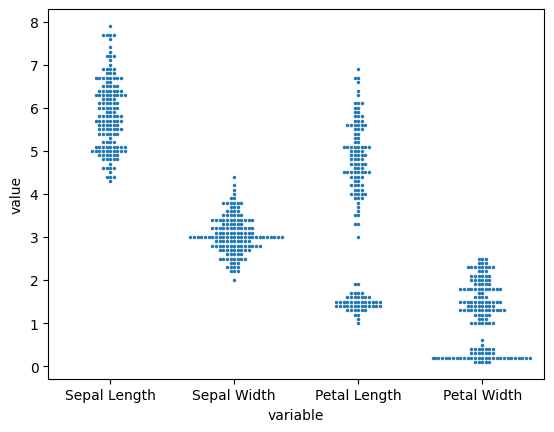

In [11]:
# seabornライブラリのインポート
import seaborn as sns
import matplotlib.pyplot as plt

# seabornでビースウォーム図を作成する
sns.swarmplot(data=pd.melt(df_features), x="variable", y="value", size=2.5)
plt.show()

#### 【コラム】探索的データ分析で有用なseabornのpairplot

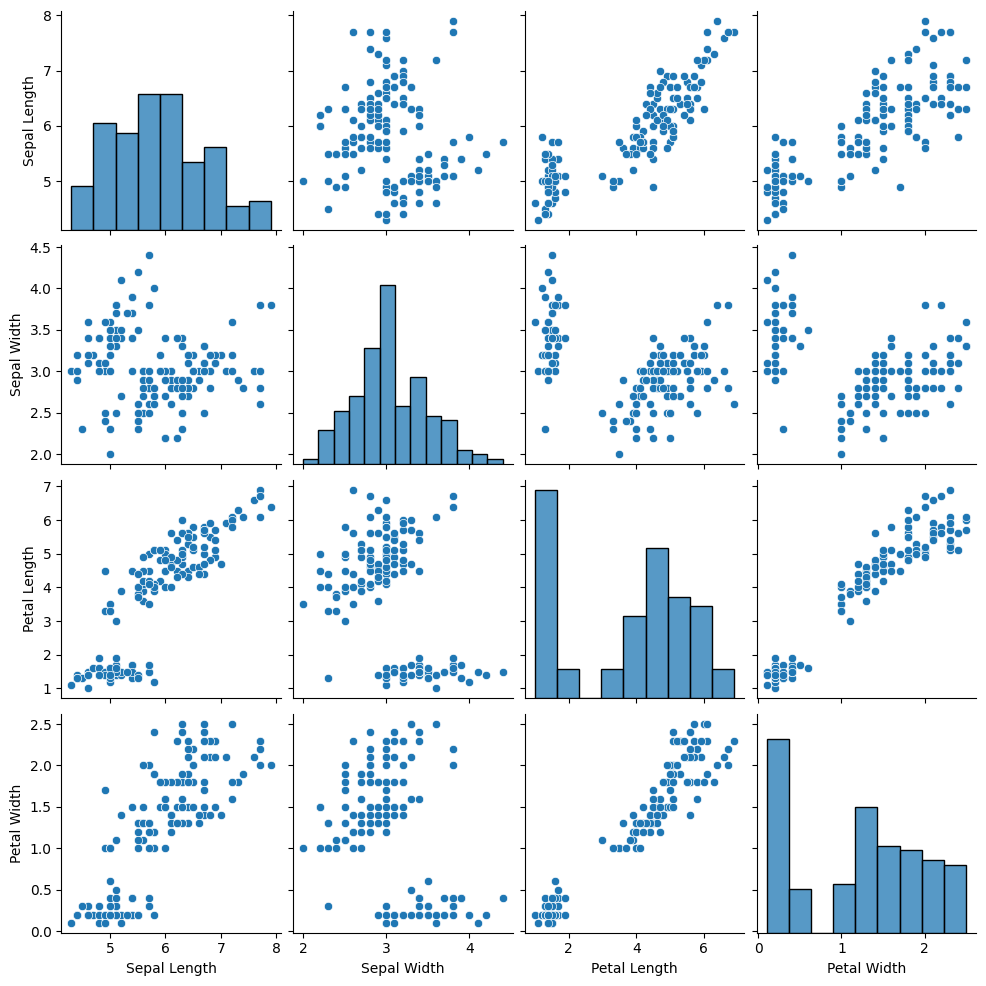

In [12]:
# DataFrame内の各特徴量のペアに対する散布図を表示
sns.pairplot(df_features)
plt.show()

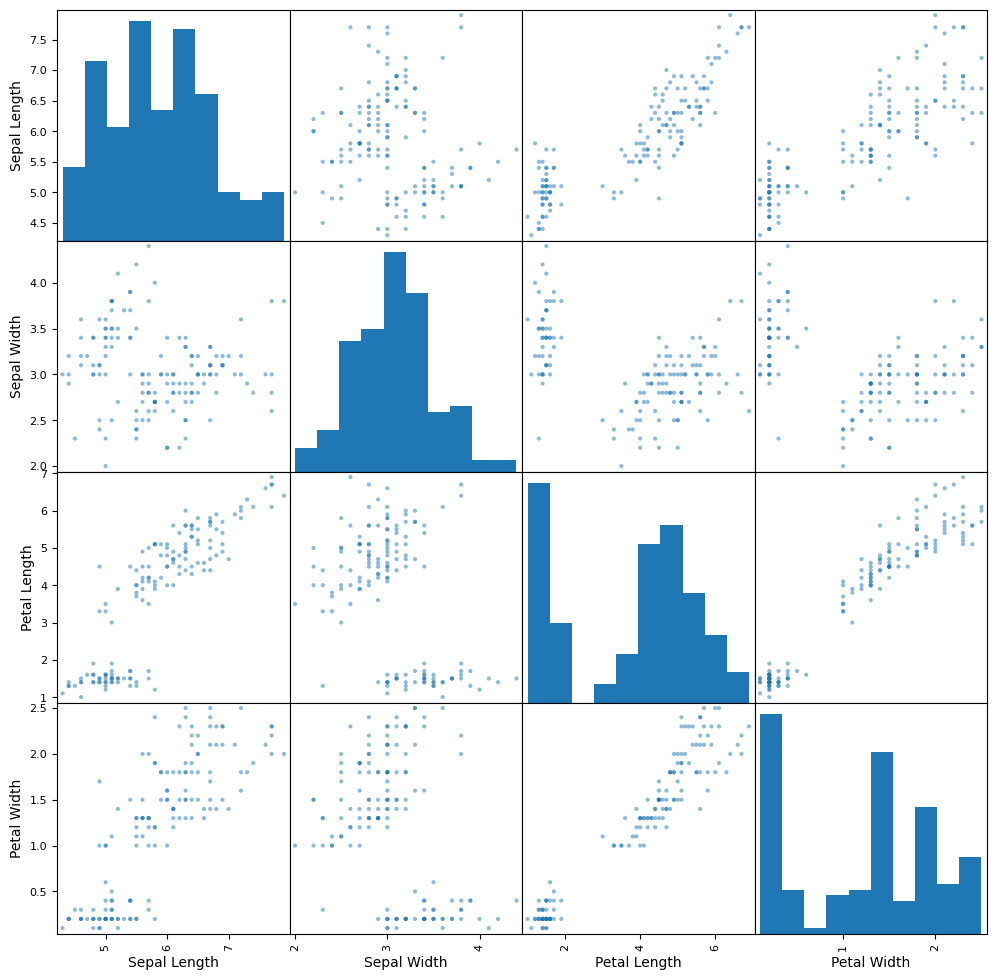

In [13]:
# 【参考】pandasで各特徴量ペアの散布図を表示する例（本ノートブックのみに掲載）
pd.plotting.scatter_matrix(df_features, figsize=(12, 12))
plt.show()

#### ●より高速な数値計算（NumPy使用）

In [14]:
#@title NumPyとpandasの速度比較の一例
# 参考： [Performance of Pandas Series vs NumPy Arrays – Pen and Pants](https://penandpants.com/2014/09/05/performance-of-pandas-series-vs-numpy-arrays/)

import numpy as np
import pandas as pd
import timeit

print(f'NumPy version: {np.version.version}')
print(f'pandas version: {pd.__version__}')

# 1次元の配列データ／Series
a = np.arange(100)
aa = np.arange(100, 200)
s = pd.Series(a)
ss = pd.Series(aa)

# 2次元の配列データ／DataFrame
a2d = np.random.rand(100, 100)
s2d = pd.DataFrame(a2d)

# ランダムなインデックス
i = np.random.choice(a, size=10)
j = np.random.choice(range(100), size=10)

# 配列要素へのアクセス速度の計測（1次元データと2次元データ）
time_np_access_1d  = timeit.timeit("a[i]", globals=globals(), number=1000)
time_pd_access_1d = timeit.timeit("s[i]", globals=globals(), number=1000)
time_np_access_2d = timeit.timeit("a2d[j, i]", globals=globals(), number=1000)
time_pd_access_2d = timeit.timeit("s2d.iloc[j, i]", globals=globals(), number=1000)

# 掛け算速度の計測（1次元データ）
time_np_multip_1d = timeit.timeit("a * aa", globals=globals(), number=100)
time_pd_multip_1d = timeit.timeit("s * ss", globals=globals(), number=100)

# 平均計算速度の計測（1次元データと2次元データ）
time_np_mean_1d = timeit.timeit("a.mean()", globals=globals(), number=100)
time_pd_mean_1d = timeit.timeit("s.mean()", globals=globals(), number=100)
time_np_mean_2d = timeit.timeit("a2d.mean()", globals=globals(), number=100)
time_pd_mean_2d = timeit.timeit("s2d.mean()", globals=globals(), number=100)

# 結果を表示
print(f"NumPyのndarray（1次元）へのアクセス時間: {time_np_access_1d:.5f}秒")
print(f"pandasのSeries（1次元）へのアクセス時間: {time_pd_access_1d:.5f}秒")
print(f"NumPyのndarray（2次元）へのアクセス時間: {time_np_access_2d:.5f}秒")
print(f"pandasのDataFrame（2次元）へのアクセス時間: {time_pd_access_2d:.5f}秒")

print(f"NumPyのndarray（1次元）の掛け算時間: {time_np_multip_1d:.5f}秒")
print(f"pandasのSeries（1次元）の掛け算時間: {time_pd_multip_1d:.5f}秒")

print(f"NumPyのndarray（1次元）への平均計算時間: {time_np_mean_1d:.5f}秒")
print(f"pandasのSeries（1次元）への平均計算時間: {time_pd_mean_1d:.5f}秒")
print(f"NumPyのndarray（2次元）への平均計算時間: {time_np_mean_2d:.5f}秒")
print(f"pandasのDataFrame（2次元）への平均計算時間: {time_pd_mean_2d:.5f}秒")

# アクセスが何倍速いかを計算
speed_ratio_access_1d = time_pd_access_1d / time_np_access_1d
print(f"NumPyのndarray（1次元）へのアクセス速度は、pandasのSeriesへのアクセス速度の{speed_ratio_access_1d:.2f}倍速い！")
speed_ratio_access_2d = time_pd_access_2d / time_np_access_2d
print(f"NumPyのndarray（2次元）へのアクセス速度は、pandasのDataFrameへのアクセス速度の{speed_ratio_access_2d:.2f}倍速い！")

# 掛け算が何倍速いかを計算
speed_ratio_multiplication = time_pd_multip_1d / time_np_multip_1d
print(f"NumPyのndarray（1次元）の掛け算速度は、pandasのSeriesの掛け算速度の{speed_ratio_multiplication:.2f}倍速い！")

# 平均計算が何倍速いかを計算
speed_ratio_mean_1d = time_pd_mean_1d / time_np_mean_1d
print(f"NumPyのndarray（1次元）の平均計算速度は、pandasのSeriesの平均計算速度の{speed_ratio_mean_1d:.2f}倍速い！")
speed_ratio_mean_2d = time_pd_mean_2d / time_np_mean_2d
print(f"NumPyのndarray（2次元）の平均計算速度は、pandasのDataFrameの平均計算速度の{speed_ratio_mean_2d:.2f}倍速い！")

# Colab（無料版）での実行例
# NumPy version: 1.25.2
# pandas version: 2.0.3
# NumPyのndarray（1次元）へのアクセス時間: 0.00046秒
# pandasのSeries（1次元）へのアクセス時間: 0.43921秒
# NumPyのndarray（2次元）へのアクセス時間: 0.00133秒
# pandasのDataFrame（2次元）へのアクセス時間: 0.28215秒
# NumPyのndarray（1次元）の掛け算時間: 0.00008秒
# pandasのSeries（1次元）の掛け算時間: 0.00892秒
# NumPyのndarray（1次元）への平均計算時間: 0.00085秒
# pandasのSeries（1次元）への平均計算時間: 0.00497秒
# NumPyのndarray（2次元）への平均計算時間: 0.00152秒
# pandasのDataFrame（2次元）への平均計算時間: 0.03242秒
# NumPyのndarray（1次元）へのアクセス速度は、pandasのSeriesへのアクセス速度の946.28倍速い！
# NumPyのndarray（2次元）へのアクセス速度は、pandasのDataFrameへのアクセス速度の212.41倍速い！
# NumPyのndarray（1次元）の掛け算速度は、pandasのSeriesの掛け算速度の112.18倍速い！
# NumPyのndarray（1次元）の平均計算速度は、pandasのSeriesの平均計算速度の5.86倍速い！
# NumPyのndarray（2次元）の平均計算速度は、pandasのDataFrameの平均計算速度の21.33倍速い！

NumPy version: 2.0.2
pandas version: 2.2.2
NumPyのndarray（1次元）へのアクセス時間: 0.00027秒
pandasのSeries（1次元）へのアクセス時間: 0.20073秒
NumPyのndarray（2次元）へのアクセス時間: 0.00132秒
pandasのDataFrame（2次元）へのアクセス時間: 0.20179秒
NumPyのndarray（1次元）の掛け算時間: 0.00007秒
pandasのSeries（1次元）の掛け算時間: 0.00535秒
NumPyのndarray（1次元）への平均計算時間: 0.00057秒
pandasのSeries（1次元）への平均計算時間: 0.00162秒
NumPyのndarray（2次元）への平均計算時間: 0.00078秒
pandasのDataFrame（2次元）への平均計算時間: 0.01646秒
NumPyのndarray（1次元）へのアクセス速度は、pandasのSeriesへのアクセス速度の750.97倍速い！
NumPyのndarray（2次元）へのアクセス速度は、pandasのDataFrameへのアクセス速度の152.32倍速い！
NumPyのndarray（1次元）の掛け算速度は、pandasのSeriesの掛け算速度の73.02倍速い！
NumPyのndarray（1次元）の平均計算速度は、pandasのSeriesの平均計算速度の2.82倍速い！
NumPyのndarray（2次元）の平均計算速度は、pandasのDataFrameの平均計算速度の21.16倍速い！


In [15]:
import numpy as np

# pandasのDataFrameをndarray（NumPy配列）に変換
features_array = df_features.to_numpy(dtype='float32')

# NumPyで各列の平均値を計算する
mean_features = np.mean(features_array, axis=0)
mean_features  # 出力例： array([5.8510065, 3.0563755, 3.7744968, 1.2060403], dtype=float32)

array([5.8510065, 3.0563755, 3.7744968, 1.2060403], dtype=float32)

#### 【コラム】正規化や標準化を行うにはscikit-learnが便利

In [16]:
from sklearn.preprocessing import StandardScaler

# scikit-learnで全ての特徴量を標準化
scaler = StandardScaler()
sk_scaled = scaler.fit_transform(features_array)
sk_scaled[:2]  # 先頭2行を表示する
# 出力例：
# array([[-0.9128386,  1.0181674, -1.353994 , -1.3275825],
#        [-1.1559356, -0.1293889, -1.353994 , -1.3275825]], dtype=float32)

array([[-0.9128386,  1.0181674, -1.353994 , -1.3275825],
       [-1.1559356, -0.1293889, -1.353994 , -1.3275825]], dtype=float32)

In [17]:
# 【参考】NumPyで標準化を手計算する例（本ノートブックのみに掲載）
data = features_array.copy()
pd_scaled = (data - data.mean(axis=0)) / data.std(axis=0, ddof=0)
pd_scaled[:5]  # 先頭5行を表示する

array([[-0.9128407 ,  1.0181681 , -1.3539939 , -1.3275827 ],
       [-1.1559378 , -0.12938811, -1.3539939 , -1.3275827 ],
       [-1.520584  ,  0.1001229 , -1.2969716 , -1.3275827 ],
       [-1.0343893 ,  1.2476791 , -1.3539939 , -1.3275827 ],
       [-0.5481945 ,  1.9362133 , -1.1829268 , -1.0636605 ]],
      dtype=float32)

In [18]:
# 【参考】pandasで標準化を手計算する例（本ノートブックのみに掲載）
data = pd.DataFrame(features_array)
pd_scaled = (data - data.mean()) / data.std(ddof=0)
pd_scaled[:5]  # 先頭5行を表示する

,0,1,2,3
0,-0.912838,1.018168,-1.353994,-1.327582
1,-1.155936,-0.129388,-1.353994,-1.327582
2,-1.520582,0.100123,-1.296972,-1.327582
3,-1.034387,1.247679,-1.353994,-1.327582
4,-0.548192,1.936213,-1.182927,-1.063660


### ■5. 機械学習の準備：データを訓練用とテスト用に分割しよう（scikit-learn使用）

In [19]:
from sklearn.model_selection import train_test_split

X = df_features  # 入力データ（X：特徴量）：モデルへ入力する説明変数
y = df_dropped['Class_ID'] # 正解値（y：ラベル）：予測したい目的変数

# データを訓練セットとテストセットに分割（テストセットは全体の10％に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 訓練セットの特徴量とラベルを結合して、先頭5行を表示
pd.concat([X_train, y_train], axis=1).head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class_ID
57,4.9,2.4,3.3,1.0,1
137,6.4,3.1,5.5,1.8,2
70,5.9,3.2,4.8,1.8,1
56,6.3,3.3,4.7,1.6,1
132,6.4,2.8,5.6,2.2,2


In [20]:
# 訓練セットからさらに検証セットを分割（検証セットも全体の10％に設定）
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=1/9, random_state=42)

In [21]:
# 【参考】pandasを使って分割する方法（本ノートブックのみに掲載）

# データフレームをまとめて連結
df_combined = pd.concat([X, y], axis=1)

# データをランダムにシャッフル（※忘れないように注意）
df_shuffled = df_combined.sample(frac=1, random_state=42)

# シャッフルされたデータから特徴量とターゲットを分離
X_shuffled = df_shuffled.loc[:, ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
y_shuffled = df_shuffled.loc[:, ['Class_ID']]

# データを訓練用のテスト用に分割
test_size = 0.1
test_index = int(len(X_shuffled) * test_size)

X_train2 = X_shuffled.iloc[:-test_index]
X_test2 = X_shuffled.iloc[-test_index:]
y_train2 = y_shuffled.iloc[:-test_index]
y_test2 = y_shuffled.iloc[-test_index:]

pd.concat([X_train2, y_train2], axis=1).head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class_ID
74,6.4,2.9,4.3,1.3,1
19,5.1,3.8,1.5,0.3,0
118,7.7,2.6,6.9,2.3,2
79,5.7,2.6,3.5,1.0,1
77,6.7,3.0,5.0,1.7,1


### ■6. 機械学習の実践：訓練～予測～評価しよう（scikit-learnの使い方）

In [22]:
from sklearn.naive_bayes import GaussianNB

# 機械学習のアルゴリズムを選択
model = GaussianNB(var_smoothing=1e-9)  # ナイーブベイズ分類器

In [23]:
# 訓練セットを入力して、機械学習モデルを訓練
model.fit(X_train, y_train)

GaussianNB()

In [24]:
# テストセットを入力して、訓練済みモデルで予測
pred_test = model.predict(X_test)

pred_test
# 出力例： array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0], dtype=int64)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [25]:
# 【参考】テストセットのラベルの内容（本ノートブックのみに掲載）
np.array(y_test)
# 出力例： array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0], dtype=int64)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [26]:
from sklearn.metrics import accuracy_score

# テストセットによる、予測結果の評価（正解率）
print(f'Accuracy:{accuracy_score(y_test, pred_test)}')
# 出力例： Accuracy:0.9333333333333333

Accuracy:0.9333333333333333


In [27]:
# 【参考】ハイパーパラメーターのチューニングのために、検証セットで予測と評価（本ノートブックのみに掲載）
model2 = GaussianNB(var_smoothing=0.02)  # 数値を変えながら評価して、最適な値を探す
model2.fit(X_train, y_train)
pred_valid = model2.predict(X_valid)
print(f'Accuracy:{accuracy_score(y_valid, pred_valid)}')
# 出力例： Accuracy:1.0

Accuracy:1.0


### 今回は、これで終わりです。お疲れさまでした。